In [1]:
import torch
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

# custom functions and classes
from simple_mnist import Model, train, evaluate

In [3]:
transf = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.1307,), (0.3081,))])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transf)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transf)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


Example data size: torch.Size([1000, 1, 28, 28])


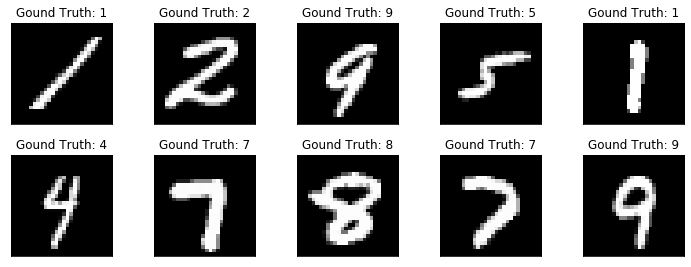

In [5]:
examples = iter(testloader)
example_data, example_targets = examples.next()

print("Example data size:", example_data.shape)
fig = plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Gound Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [6]:
model = Model()
model.to("cuda")  # load to GPU

Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

Train Epoch: 0 [0/60000 (0.0%)]	Loss: 0.190834
Train Epoch: 0 [6400/60000 (10.7%)]	Loss: 0.254462
Train Epoch: 0 [12800/60000 (21.3%)]	Loss: 0.135773
Train Epoch: 0 [19200/60000 (32.0%)]	Loss: 0.279002
Train Epoch: 0 [25600/60000 (42.6%)]	Loss: 0.201151
Train Epoch: 0 [32000/60000 (53.3%)]	Loss: 0.218948
Train Epoch: 0 [38400/60000 (64.0%)]	Loss: 0.164689
Train Epoch: 0 [44800/60000 (74.6%)]	Loss: 0.145396
Train Epoch: 0 [51200/60000 (85.3%)]	Loss: 0.217480
Train Epoch: 0 [57600/60000 (95.9%)]	Loss: 0.188217

Test set: Average loss: 0.0925, Accuracy: 97.3%

Train Epoch: 1 [0/60000 (0.0%)]	Loss: 0.085710
Train Epoch: 1 [6400/60000 (10.7%)]	Loss: 0.118354
Train Epoch: 1 [12800/60000 (21.3%)]	Loss: 0.239607
Train Epoch: 1 [19200/60000 (32.0%)]	Loss: 0.093513
Train Epoch: 1 [25600/60000 (42.6%)]	Loss: 0.234274
Train Epoch: 1 [32000/60000 (53.3%)]	Loss: 0.070593
Train Epoch: 1 [38400/60000 (64.0%)]	Loss: 0.186427
Train Epoch: 1 [44800/60000 (74.6%)]	Loss: 0.304114
Train Epoch: 1 [51200/6000

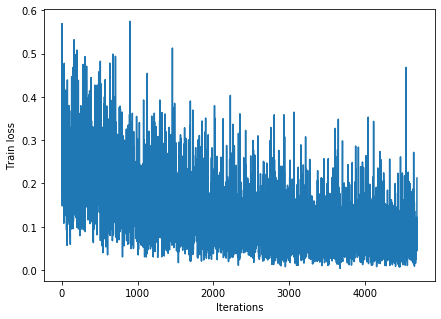

In [9]:
train_losses = []
for epoch in range(5):
    losses = train(model, trainloader, optimizer, epoch)
    train_losses = train_losses + losses
    test_loss, test_accuracy = evaluate(model, testloader)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {test_accuracy:.1f}%\n")

plt.figure(figsize=(7, 5))
plt.plot(train_losses)
plt.xlabel("Iterations")
plt.ylabel("Train loss")
plt.show()

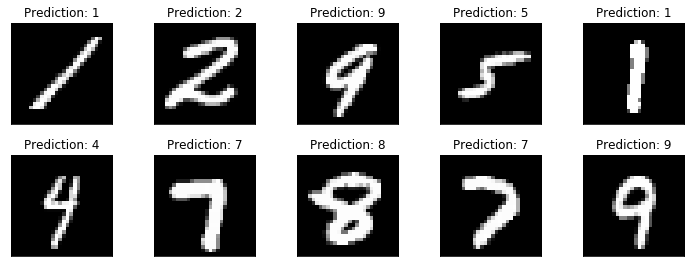

In [10]:
model.eval()

with torch.no_grad():
    output = model(example_data.to("cuda"))

fig = plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [11]:
torch.save(model.state_dict(), "mnist_cnn.pt")